<a href="https://colab.research.google.com/github/ADRITATITIR/GOLD-PRICE-PREDICTION-/blob/main/GOLD_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data collection and pre processing


In [3]:
# loading the csv data to panda data frame
gold_data = pd.read_csv('/gld_price_data.csv')
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns 
gold_data.shape

(2290, 6)

In [6]:
# getting some info about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
# checking the missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measure of the data 
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation-
1. Positive correlation
2. Negative correlation

In [11]:
correlation = gold_data.corr()

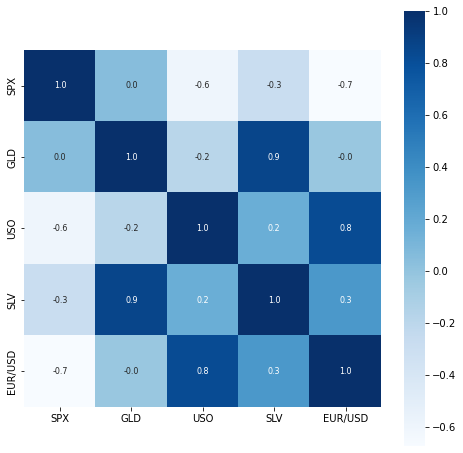

In [13]:
# constructing a heat map to understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')


In [15]:
# correlation value of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


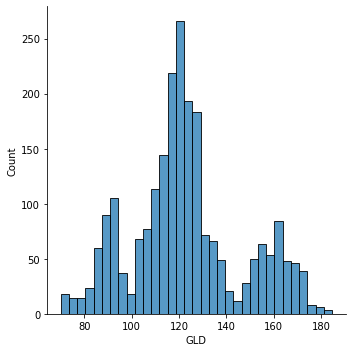

In [16]:
# Checking the distribution of GLD price
sns.displot(gold_data['GLD'])

Splitting the features and the target


In [18]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [19]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [20]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into training and test data 

In [21]:
X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size= 0.2, random_state=2)

Model training
Random forest regressor


In [22]:
regressor = RandomForestRegressor(n_estimators=100)

In [23]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model evaluation


In [24]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [25]:
print(test_data_prediction)

[168.15199936  82.03099991 116.32450024 127.58770075 120.92900166
 154.78139829 149.99969832 126.22010046 117.35719883 126.12370028
 116.94660054 172.06990065 141.77289858 167.83669828 115.1262
 117.45770008 138.30050292 170.07140036 159.54790224 160.59069865
 155.1433004  125.35320018 175.5789996  156.97040394 125.22080063
  93.64849959  78.23369989 121.05399994 119.11179966 167.43409957
  88.26110077 125.38670035  91.31100082 117.72830007 121.09819889
 136.36300053 115.61840106 114.88390102 147.91279923 107.14050076
 103.66320205  87.14549799 126.49580045 118.02169961 152.81099901
 119.62469965 108.30229978 108.15329852  93.14670032 127.19199792
  74.19300072 113.62629942 120.99230032 111.17049927 119.04919917
 120.70779908 159.00480079 167.37730191 146.95639678  85.97439866
  94.2864001   86.80489877  90.43099999 118.89790059 126.45790107
 127.61649988 169.80819975 122.40609907 117.38809924  98.71630009
 168.17640217 142.85269829 132.16080218 121.15010231 120.52889921
 119.70080075 

In [27]:
#   R squared error
error_score = metrics.r2_score(Y_test , test_data_prediction )
print("R squared error : " , error_score)

R squared error :  0.9896952832214154


comparing the actual and predicted values in a plot





In [28]:
Y_test = list(Y_test)

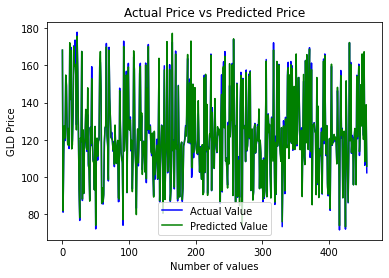

In [34]:
plt.plot(Y_test, color='blue', label ='Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()
